1826032 철학과 이로움 중간과제

# 목표

철학 전공자로서 철학을 전공하고 있지 않은 일반인들이 철학이라는 용어를 어떤 상황에서 사용하는지 그 용례를 조사함으로, 
철학이라는 학문에 대해 비전공자들이 어떤 의미를 부여하고, 어떤 생각을 하고 있는지를 파악하고자 한다.
나아가 비전공자들이 철학이라는 학문에 가지는 오해를 데이터 분석을 통해 조사함으로, 
어떤 방식으로 올바른 철학함을 알릴 수 있을지에 대해 그 방향성을 제시해보고자 한다.


# 방식

철학에 대한 비전공자의 생각을 수집하기 위해 다음과 같은 접근 방식을 선정하였다.

1. 비전공자들이 가장 많이 사용하는 포털사이트를 통해 철학과 함께 나오는 단어의 쓰임과 용례를 조사한다.
2. 한국인들이 가장 많이 사용하는 네이버와 다음 포털 사이트를 이용하고자 한다.
3. 뉴스에서 사용하는 용례와 개인 블로그에서 사용하는 용례로 나누어 조사한다.

# (1) 다음 포털 사이트의 뉴스 기사를 이용해 철학의 용례를 알아본다.

# 데이터 준비

In [42]:
# 패키지 가져오기

import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
#from konlpy.tag import Komoran
#from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')


In [5]:
# url을 통해서 해당 페이지의 html문서를 파악해보기

url ='https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EC%B2%A0%ED%95%99'

req = requests.get(url)    

page = BeautifulSoup(req.text , 'html.parser')

print(page)



<!DOCTYPE doctype html>

<html class="unix unknown " lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="철학 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%EC%B2%A0%ED%95%99" property="og:url"/>
<meta content="Daum 검색에서 철학에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>철학 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/sta

In [7]:
#먼저 검색 데이터의 headline을 추출해본다

titles = page.find_all(attrs='f_link_b')

print(titles)

[<a class="f_link_b" href="http://v.media.daum.net/v/20210509220308133?f=o" onclick='smartLog(this, "dc=NNS&amp;d=264Jr_LDIDgbfcP0zy&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16akMkKFDu6n8GTzZr&amp;e3=0&amp;ext=dsid=264Jr_LDIDgbfcP0zy", event, {"cpid": {"value": "16akMkKFDu6n8GTzZr"}});' target="_blank">일상 속 고민들 알고보면 <b>철학</b>..생각보다 재밌네</a>, <a class="f_link_b" href="https://cp.news.search.daum.net/p/106049255" onclick='smartLog(this, "dc=NNS&amp;d=26wM5RjMkOUseZgTsT&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16wi8V5SXWmfjQaW7H&amp;e3=0&amp;ext=dsid=26wM5RjMkOUseZgTsT", event, {"cpid": {"value": "16wi8V5SXWmfjQaW7H"}});' target="_blank">한국에서 ‘<b>철학</b>’하기</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210505045122752?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26uAh1LhPhsmPv1hw-&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16d4PV266g2j-N3GYq&amp;e3=0&amp;ext=dsid=26uAh1LhPhsmPv1hw-", event, {"cpid": {"value": "16d4PV266g2j-N3GYq"}});' target="_blank">'당장 써먹는' <b>철학</b>, MZ세대 사로잡

In [8]:
#검색된 title의 크기를 확인한다.
print(len(titles))

10


In [9]:
#검색된 title을 각각 프린트해 확인해본다.

for title in titles :
    print(title.text)
    print()


일상 속 고민들 알고보면 철학..생각보다 재밌네

한국에서 ‘철학’하기

'당장 써먹는' 철학, MZ세대 사로잡았다

실리콘밸리 철학 멘토 "자기계발에 도움 안 되는 철학은 시간낭비"

[숨&결] 관음충과 철학의 침묵 / 김우재

내 이웃의 무모한 교육철학

지구 구하는 철학적 '철덕'

[새로나온책] 백운주 목사, 목회 철학 정리한 신간 발표

[이진곤의 그건 아니지요] 리더십 부재와 철학 빈곤의 4년

"사람을 가장 최우선으로".. 기업철학으로 혁신적 치료제 선보여



(1)의 수집 데이터를 본격적으로 스크래핑한다.

In [10]:
title_list = []

def web_scraping(keyword, end, start = 1):   
    while 1:

        if start > end : 
            break        
        
        url ='https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={}&p={}'.format(keyword,start)

        req = requests.get(url)    

        page = BeautifulSoup(req.text , 'html.parser')

        titles = page.find_all(attrs='f_link_b')     # 헤드라인 기사를 가져옴 
        
        print(titles)    

        for one in titles:
            title_list.append(one.text)
            
        start += 1

In [21]:
#해당 함수를 이용하여 스크래핑 실시

keyword = input('검색어를 입력하세요 : ')
print()

end_page = int(input('end_page를 입력하세요 : '))

web_scraping(keyword, end_page)       # 10 페이지 까지 스크래핑을 해온다.


검색어를 입력하세요 : 철학

end_page를 입력하세요 : 100
[<a class="f_link_b" href="http://v.media.daum.net/v/20210509220308133?f=o" onclick='smartLog(this, "dc=NNS&amp;d=264Jr_LDIDgbfcP0zy&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16akMkKFDu6n8GTzZr&amp;e3=0&amp;ext=dsid=264Jr_LDIDgbfcP0zy", event, {"cpid": {"value": "16akMkKFDu6n8GTzZr"}});' target="_blank">일상 속 고민들 알고보면 <b>철학</b>..생각보다 재밌네</a>, <a class="f_link_b" href="https://cp.news.search.daum.net/p/106049255" onclick='smartLog(this, "dc=NNS&amp;d=26wM5RjMkOUseZgTsT&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16wi8V5SXWmfjQaW7H&amp;e3=0&amp;ext=dsid=26wM5RjMkOUseZgTsT", event, {"cpid": {"value": "16wi8V5SXWmfjQaW7H"}});' target="_blank">한국에서 ‘<b>철학</b>’하기</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210505045122752?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26uAh1LhPhsmPv1hw-&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16d4PV266g2j-N3GYq&amp;e3=0&amp;ext=dsid=26uAh1LhPhsmPv1hw-", event, {"cpid": {"value": "16d4PV266g2j-N3GYq"}});' targe

In [22]:
# 수집해온 헤드라인 갯수를 확인 

print(len(title_list))

2000


# 데이터 전처리
형태소 분석을 통해 데이터를 전처리하는 과정을 진행한다.

In [23]:
#해당 자료에 나와 있는 형태소를 분석한다.

kkma = Kkma()

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)


print(sentences_tag)

[[('일상', 'NNG'), ('속', 'NNG'), ('고민', 'NNG'), ('들', 'XSN'), ('알', 'VV'), ('고', 'ECE'), ('보', 'VXV'), ('면', 'ECE'), ('철학', 'NNG'), ('..', 'SW'), ('생각', 'NNG'), ('보다', 'JKM'), ('재밌', 'VA'), ('네', 'EFN')], [('한국', 'NNG'), ('에서', 'JKM'), ('‘', 'SS'), ('철학', 'NNG'), ('’', 'SS'), ('하', 'VV'), ('기', 'ETN')], [("'", 'SS'), ('당', 'NNG'), ('장', 'NNG'), ('써먹', 'VV'), ('는', 'ETD'), ("'", 'SS'), ('철학', 'NNG'), (',', 'SP'), ('MZ', 'OL'), ('세대', 'NNG'), ('사로잡', 'VV'), ('았', 'EPT'), ('다', 'EFN')], [('실리콘', 'NNG'), ('밸리', 'NNG'), ('철학', 'NNG'), ('메', 'VV'), ('ㄴ', 'ETD'), ('토', 'NNG'), ('"', 'SS'), ('자', 'NNG'), ('기계', 'NNG'), ('발', 'NNG'), ('에', 'JKM'), ('도움', 'NNG'), ('안', 'MAG'), ('되', 'VV'), ('는', 'ETD'), ('철학', 'NNG'), ('은', 'JX'), ('시간', 'NNG'), ('낭비', 'NNG'), ('"', 'SS')], [('[', 'SS'), ('숨', 'NNG'), ('&', 'SW'), ('결', 'NNG'), (']', 'SS'), ('관음', 'NNG'), ('충과', 'NNG'), ('철학', 'NNG'), ('의', 'JKG'), ('침묵', 'NNG'), ('/', 'SP'), ('김', 'NNG'), ('우', 'XSN'), ('재', 'XPN')], [('내', 'NP'), ('이웃', 'NNG'), 

# 데이터 분석
키워드 추출

In [15]:
#의미있는 단어인 명사만을 추출한다.

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NNG']:               
            noun_list.append(word)
            
print(noun_list)

['일상', '속', '고민', '철학', '생각', '한국', '철학', '당', '장', '철학', '세대', '실리콘', '밸리', '철학', '토', '자', '기계', '발', '도움', '철학', '시간', '낭비', '숨', '결', '관음', '충과', '철학', '침묵', '김', '이웃', '무모', '교육', '철학', '지구', '철학적', '철', '덕', '책', '백운', '주', '목사', '목회', '철학', '정리', '신간', '발표', '이진', '곤의', '리더십', '부재', '철학', '빈곤', '사람', '우선', '기업', '철학', '혁신적', '치료제', '서울', '광장', '검사', '자격', '검찰', '총장', '철학', '박홍', '환', '논설위원', '동양', '포럼', '문제', '포스트', '코로나', '노년', '철학', '상', '주', '목', '책', '디즈니', '철학', '수업', '검찰', '총장', '인선', '기준', '국정', '철학', '중요', '교', '촌', '치킨', '창립', '역사', '기업', '철학', '담', '광고', '김', '읍', '김', '오수', '득표수', '국정', '철학', '코드', '인사', '서관', '독서', '아카데미', '예술', '역사', '철학', '세상', '읽기', '임', '책', '마을', '삶', '문제', '해결', '지혜', '철학', '노형', '임', '철학', '실력', '검증', '촉구', '철학', '감염병', '희귀', '질환', '극복', '인프라', '공직', '최다', '미', '네이트', '김', '오수', '지명', '국정', '철학', '반영', '결과', '신', '삼성', '철학', '이유', '책', '아재', '독서', '일기', '공부', '철학', '신', '소', '익스프레스', '철학', '모험', '인간', '생존', '법칙', '총장', '인선', '기준', '박', '범계', '

In [24]:
# 의미없는 조사 등을 제외하기 위해 두음절 이상의 단어만을 추출한다.

print('전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]  


print('두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

전체 명사의 수 =  6102

두음절 이상의 명사의 수 =  6102

['일상', '고민', '철학', '생각', '한국', '철학', '철학', '세대', '실리콘', '밸리', '철학', '기계', '도움', '철학', '시간', '낭비', '관음', '충과', '철학', '침묵', '이웃', '무모', '교육', '철학', '지구', '철학적', '백운', '목사', '목회', '철학', '정리', '신간', '발표', '이진', '곤의', '리더십', '부재', '철학', '빈곤', '사람', '우선', '기업', '철학', '혁신적', '치료제', '서울', '광장', '검사', '자격', '검찰', '총장', '철학', '박홍', '논설위원', '동양', '포럼', '문제', '포스트', '코로나', '노년', '철학', '디즈니', '철학', '수업', '검찰', '총장', '인선', '기준', '국정', '철학', '중요', '치킨', '창립', '역사', '기업', '철학', '광고', '오수', '득표수', '국정', '철학', '코드', '인사', '서관', '독서', '아카데미', '예술', '역사', '철학', '세상', '읽기', '마을', '문제', '해결', '지혜', '철학', '노형', '철학', '실력', '검증']


In [26]:
#추출된 단어들의 출현 횟수를 확인하여, 
#어떤 단어와 가장 빈도수가 높게 사용되는지를 확인한다.

counts = Counter(noun_list)

words = counts.most_common(100)

print(words)

[('철학', 758), ('농심', 182), ('동원', 138), ('부회장', 96), ('중천', 90), ('아버지', 86), ('국정', 66), ('경영', 64), ('총장', 60), ('도서관', 60), ('유산', 60), ('브랜드', 54), ('반영', 48), ('검찰', 44), ('시민', 44), ('참여자', 42), ('신춘', 40), ('회장', 38), ('대통령', 36), ('역사', 34), ('테이블', 34), ('한국', 32), ('범계', 30), ('디자인', 30), ('홈페이지', 28), ('그룹', 26), ('제일제당', 26), ('캠페인', 26), ('치킨', 22), ('시대', 22), ('영결식', 22), ('과학', 18), ('가치', 18), ('제일', 18), ('공개', 18), ('비고', 18), ('교육', 16), ('철학적', 16), ('광고', 16), ('정치', 16), ('영화', 16), ('국가', 16), ('디지털', 16), ('철도망', 16), ('한식', 16), ('이재명', 14), ('상관성', 14), ('칼럼', 14), ('기부', 14), ('대표', 14), ('단장', 14), ('기아', 14), ('은행', 14), ('북도', 14), ('의회', 14), ('채널', 14), ('리브', 14), ('랜딩', 14), ('창립', 12), ('오수', 12), ('국민', 12), ('감독', 12), ('이성', 12), ('사업', 12), ('강좌', 12), ('지구의', 12), ('개편', 12), ('진행', 12), ('근대', 12), ('확대', 12), ('음악', 12), ('일상', 10), ('사람', 10), ('서울', 10), ('동양', 10), ('인선', 10), ('서관', 10), ('인간', 10), ('준석', 10), ('이해', 10), ('여정', 10), ('연기

# 분석 결과 시각화

{'철학': 758, '농심': 182, '동원': 138, '부회장': 96, '중천': 90, '아버지': 86, '국정': 66, '경영': 64, '총장': 60, '도서관': 60, '유산': 60, '브랜드': 54, '반영': 48, '검찰': 44, '시민': 44, '참여자': 42, '신춘': 40, '회장': 38, '대통령': 36, '역사': 34, '테이블': 34, '한국': 32, '범계': 30, '디자인': 30, '홈페이지': 28, '그룹': 26, '제일제당': 26, '캠페인': 26, '치킨': 22, '시대': 22, '영결식': 22, '과학': 18, '가치': 18, '제일': 18, '공개': 18, '비고': 18, '교육': 16, '철학적': 16, '광고': 16, '정치': 16, '영화': 16, '국가': 16, '디지털': 16, '철도망': 16, '한식': 16, '이재명': 14, '상관성': 14, '칼럼': 14, '기부': 14, '대표': 14, '단장': 14, '기아': 14, '은행': 14, '북도': 14, '의회': 14, '채널': 14, '리브': 14, '랜딩': 14, '창립': 12, '오수': 12, '국민': 12, '감독': 12, '이성': 12, '사업': 12, '강좌': 12, '지구의': 12, '개편': 12, '진행': 12, '근대': 12, '확대': 12, '음악': 12, '일상': 10, '사람': 10, '서울': 10, '동양': 10, '인선': 10, '서관': 10, '인간': 10, '준석': 10, '이해': 10, '여정': 10, '연기': 10, '성찰': 10, '워킹': 10, '원주': 10, '세계': 10, '교수': 10, '혁신': 10, '보험': 10, '철의': 10, '비전': 10, '주택': 10, '창간': 10, '시간': 8, '빈곤': 8, '포럼': 8, '기준': 8, '중요': 8, '

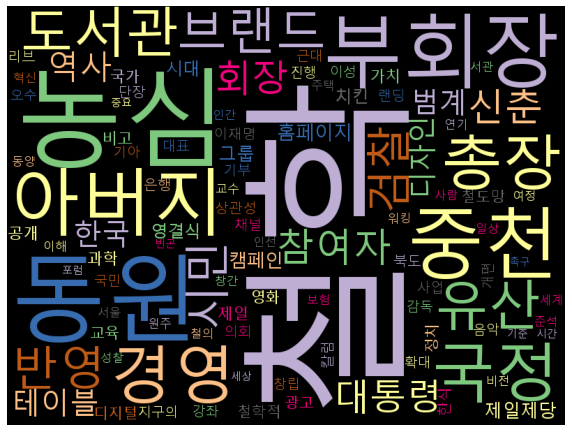

In [27]:
#단어의 출현 횟수에 근거해 word cloud를 생성한다.

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()


# 중간 점검
다음의 뉴스 기사를 사용하여 철학의 용례를 사용하였다.
이 경우, 철학을 제외한 가장 많이 사용된 상위 100가지 단어의 대략적인 상위 분류는 다음과 같다.

1. 기업 철학

('농심', 182), ('동원', 138), ('부회장', 96), ('경영', 64), ('유산', 60), ('브랜드', 54), ('회장', 38), ('그룹', 26), ('제일제당', 26), ('캠페인', 26),('광고', 16), ('정치', 16), ('이재명', 14) ('기부', 14), ('대표', 14), ('기아', 14), ('은행', 14),('리브', 14),('창립', 12), ('사업', 12)

2. 정치

('국정', 66), ('총장', 60), ('검찰', 44), ('시민', 44),('대통령', 36),('한국', 32)('국가', 16),('의회', 14), ('국민', 12),('개편', 12)


3. 역사/교육

('시대', 22)('교육', 16)('과학', 18)('강좌', 12)('포럼', 8)


4. 실제 철학 관련

('철학적', 16)('동양', 10) ('인간', 10)


5. 기타

('중천', 90), ('아버지', 86) , ('도서관', 60), ('반영', 48), ('참여자', 42), ('신춘', 40), ('역사', 34), ('테이블', 34), ('범계', 30), ('디자인', 30), ('홈페이지', 28),  ('치킨', 22) , ('영결식', 22), ('가치', 18), ('제일', 18), ('공개', 18), ('비고', 18), ('영화', 16), ('디지털', 16), ('철도망', 16), ('한식', 16), ('상관성', 14), ('칼럼', 14), ('단장', 14),  ('북도', 14), ('채널', 14), ('랜딩', 14), ('오수', 12), ('감독', 12), ('이성', 12) , ('지구의', 12), ('진행', 12), ('근대', 12), ('확대', 12), ('음악', 12), ('일상', 10), ('사람', 10), ('서울', 10), , ('인선', 10), ('서관', 10), ('준석', 10), ('이해', 10), ('여정', 10), ('연기', 10), ('성찰', 10), ('워킹', 10), ('원주', 10), ('세계', 10), ('교수', 10), ('혁신', 10), ('보험', 10), ('철의', 10), ('비전', 10), ('주택', 10), ('창간', 10), ('시간', 8), ('빈곤', 8), ('기준', 8), ('중요', 8), ('세상', 8), ('촉구', 8)

철학의 용례는 실제 학문적 철학함을 언급하기보다는 오히려 기업의 이미지, 국가 정치적 이미지와 함께 쓰이는 경우가 많은 것을 확인해 볼 수 있었다.

# (2) 네이버 모바일의 일상 블로그 글의 제목을 크롤링한 뒤, CSV파일로 만들어 분석.

# 데이터 준비

In [35]:
import csv 
import ssl 
from urllib.request import urlopen 
from urllib.parse import quote_plus 
from bs4 import BeautifulSoup 

context = ssl._create_unverified_context() 

#api_txt_lines total_tit 

search = input("검색어를 입력하세요 : ") 
url = 'https://m.search.naver.com/search.naver?where=m_view&sm=mtb_jum&query=%' 
newUrl = url + quote_plus(search) 

html = urlopen(newUrl, context=context).read() 
soup = BeautifulSoup(html,'html.parser') 

total = soup.select('.api_txt_lines.total_tit') #아까 내용이 있던거 싹 가져오기 
searchList = []

for i in total : 
    print(i.text) #call title 
    print(i.attrs['href']) #call link 
    print()


for i in total : 
    temp =[] 
    temp.append(i.text) 
    temp.append(i.attrs['href']) 
    searchList.append(temp) #list 안에 list 가 들어가는 형태

검색어를 입력하세요 : 철학
서산기구필라테스 철학이 있는 수업 필라테스진
https://m.blog.naver.com/ch23052/222335064931

아이를 잘 키우는 방법 4가지 <철학, 대화, 기질, 훈육>
https://m.blog.naver.com/rosesharon77/222342513877

영화 매트릭스와 철학
https://m.blog.naver.com/starsunsmile/222333138891

[생각의 힘, 인생철학] 항상 기뻐하라
https://m.blog.naver.com/hifeels/222306696641

episode #14. 삶의 가치와 집에 대한 철학
https://m.blog.naver.com/rockez/222339467959

소크라테스 익스프레스: 철학이 우리 인생에 스며드는 순간
https://m.post.naver.com/viewer/postView.nhn?volumeNo=31360054&memberNo=8527280&vType=VERTICAL

아나운서 엄마의 육아 (36개월 4세 교육 철학/영어대화/경제교육/글로벌인재/10년 후 목표)
https://m.blog.naver.com/sora_lovely_/222332647634

저는 철학을 좋아합니다
https://m.cafe.naver.com/chogca/1159481

동양철학은 정말 발전이 없었을까?
https://m.cafe.naver.com/booheong/205031

"왜_세계사의_시간은_거꾸로_흐르는가", 마르쿠스 가브리엘의 신실재론을 담은 철학책
https://m.blog.naver.com/forgrief/222324031226

마케팅 전략에서의 철학...
https://m.blog.naver.com/rlawlgks999/222335047155

[박항준 칼럼] 크립토 프로젝트의 실패는 '바르지 못한 철학 선택의 대가'
https://m.blog.naver.com/danwool/222322384432

철학하는 공학도 (부제: 오늘도 딴

In [36]:
#추출한 내용을 csv로 저장한다.

f = open(f'{search}.csv','w',encoding='utf-8',newline='') #파일오픈 
csvWriter = csv.writer(f)#열어둔 파일 

for i in searchList: 
    csvWriter.writerow(i) 
    
f.close() 
print("완료 !")

완료 !


In [37]:
#DTM  TF-IDF를 이용하여 데이터 분석하기

#데이터 읽어 오기

philosophy = pd.read_csv("철학.csv")


# 데이터 크기 확인 

philosophy.shape


(29, 2)

In [38]:
#데이터에 관한 전반적인 정보 확인

philosophy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   서산기구필라테스 철학이 있는 수업 필라테스진                       29 non-null     object
 1   https://m.blog.naver.com/ch23052/222335064931  29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [59]:
#열 이름이 지정되어 있지 않으므로 열 이름 지정

philosophy = philosophy.rename(columns={philosophy.columns[0] :'title',
                          philosophy.columns[1] :'url'})

In [60]:
#잘 바뀐 것을 확인할 수 있다.

philosophy.keys()

Index(['title', 'url'], dtype='object')

In [61]:
philosophy.head()

,title,url
0,"아이를 잘 키우는 방법 4가지 <철학, 대화, 기질, 훈육>",https://m.blog.naver.com/rosesharon77/22234251...
1,영화 매트릭스와 철학,https://m.blog.naver.com/starsunsmile/22233313...
2,"[생각의 힘, 인생철학] 항상 기뻐하라",https://m.blog.naver.com/hifeels/222306696641
3,episode #14. 삶의 가치와 집에 대한 철학,https://m.blog.naver.com/rockez/222339467959
4,소크라테스 익스프레스: 철학이 우리 인생에 스며드는 순간,https://m.post.naver.com/viewer/postView.nhn?v...


In [62]:
philosophy.tail()

,title,url
24,[철학책모임] 1페이지철학365 아홉번째 공부기록,https://m.blog.naver.com/hada84/222333984985
25,수지유치원 원장님 철학이 남다르니 아이들이 남다르게 성장 중!,https://m.blog.naver.com/aldbaldod/222326125483
26,<비트겐슈타인 철학으로의 초대>를 읽고나서,https://m.blog.naver.com/changhyun86/222341091771
27,디즈니 영화 속 숨어 있는 철학 이야기,https://m.blog.naver.com/smgbooks/222315581855
28,"불교는 종교인가, 철학인가?",https://m.blog.naver.com/corviet/222341869247


# 데이터 분석
키워드 추출

In [63]:
okt = Okt()  

# 두 음절 이상의 명사만 추출하는 함수를 정의 

def tokenizer(title):
    nouns = okt.nouns(title)
    return [noun for noun in nouns if len(noun) > 1] 



In [64]:
count_vectorizer = CountVectorizer(tokenizer=tokenizer)   

count_vectorizer.fit(philosophy['title'])


# 위의 fit 메소드를 이용해 구한 단어를 처음부터 20개의 단어를 출력하고 확인
print('▶ 처음부터 20개의 단어를 출력 = \n', count_vectorizer.get_feature_names()[: 20])   
print()

print(count_vectorizer.vocabulary_) 
print()

▶ 처음부터 20개의 단어를 출력 = 
 ['가브리엘', '가요', '가지', '가치', '개똥', '개월', '개인', '거꾸로', '경제', '공부', '공학', '교과서', '교육', '교토', '글로벌', '기록', '기질', '김매기', '난젠', '대가']

{'아이': 57, '방법': 35, '가지': 2, '철학': 84, '대화': 21, '기질': 16, '훈육': 100, '영화': 64, '매트릭스': 30, '생각': 41, '인생': 76, '항상': 98, '가치': 3, '대한': 20, '소크라테스': 46, '익스': 73, '프레': 92, '우리': 66, '순간': 49, '아나운서': 56, '엄마': 60, '육아': 71, '개월': 5, '교육': 12, '영어': 63, '경제': 8, '글로벌': 14, '인재': 77, '목표': 32, '동양철학': 24, '정말': 82, '발전': 34, '세계사': 45, '시간': 51, '거꾸로': 7, '마르쿠스': 27, '가브리엘': 0, '실재론': 52, '마케팅': 28, '전략': 79, '박항준': 33, '칼럼': 88, '크립': 89, '프로젝트': 94, '실패': 54, '선택': 43, '대가': 19, '공학': 10, '부제': 36, '오늘': 65, '추천': 87, '위안': 68, '인문': 74, '교과서': 11, '스토': 50, '수업': 47, '사람': 40, '쓸모': 55, '비판': 39, '어찌': 59, '실제': 53, '프로': 93, '하츠': 95, '김매기': 17, '개똥': 4, '초등': 86, '전집': 80, '한나': 97, '렌트': 26, '전체주의': 81, '이야기': 72, '학년': 96, '도서': 22, '도촬': 23, '유지': 69, '가요': 1, '교토': 13, '여행지': 62, '난젠': 18, '여유': 61, '만끽': 29, '인문학': 75, '입문': 7

In [65]:
print('▶ 사용된 전체 단어 수 = ', len(list(count_vectorizer.vocabulary_))) 
print()

print(list(count_vectorizer.vocabulary_)[: 100])    # 전체 단어를 list 타입으로 변환한 후 100개만 선택 출력 


▶ 사용된 전체 단어 수 =  101

['아이', '방법', '가지', '철학', '대화', '기질', '훈육', '영화', '매트릭스', '생각', '인생', '항상', '가치', '대한', '소크라테스', '익스', '프레', '우리', '순간', '아나운서', '엄마', '육아', '개월', '교육', '영어', '경제', '글로벌', '인재', '목표', '동양철학', '정말', '발전', '세계사', '시간', '거꾸로', '마르쿠스', '가브리엘', '실재론', '마케팅', '전략', '박항준', '칼럼', '크립', '프로젝트', '실패', '선택', '대가', '공학', '부제', '오늘', '추천', '위안', '인문', '교과서', '스토', '수업', '사람', '쓸모', '비판', '어찌', '실제', '프로', '하츠', '김매기', '개똥', '초등', '전집', '한나', '렌트', '전체주의', '이야기', '학년', '도서', '도촬', '유지', '가요', '교토', '여행지', '난젠', '여유', '만끽', '인문학', '입문', '디즈니', '화사', '품위', '서양철학', '개인', '모임', '페이지', '아홉', '공부', '기록', '수지', '유치원', '원장', '성장', '비트겐슈타인', '초대', '불교']


In [66]:
# fit_transform method을 이용하여 DTM 을 생성


count_matrix = count_vectorizer.fit_transform(philosophy['title'])

count_matrix


<29x101 sparse matrix of type '<class 'numpy.int64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [67]:
# 결과를 array로 변환 

count_matrix.toarray()

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
# 전체 형태를 확인 

count_matrix.toarray().shape

(29, 101)

In [69]:
# 0 번째 행의 형태를 확인 

count_matrix[0].toarray().shape

(1, 101)

In [70]:
# word cloud 함수는 입력을 리스트 형식으로 받기 때문에 array 형식을 list 형식으로 바꾸어 주어야 함 

print(count_matrix[0].toarray().squeeze()) 
print() 

count_matrix[0].toarray().squeeze().shape

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]



(101,)

# 데이터 시각화

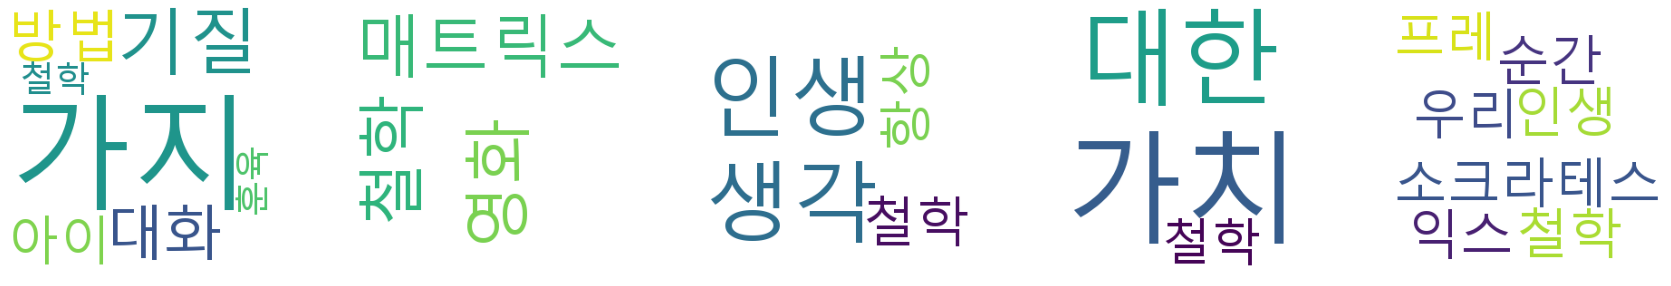

In [73]:
wordcloud = WordCloud(
    font_path="C:/windows/fonts/malgun.ttf",
    background_color='white',
    width = 300, 
    height = 300,
    max_words=50,
#     background_color="white"
)


plt.figure(figsize=(30,5))

for index in range(5) :
    value = count_matrix[index].toarray().squeeze()
    key = count_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1, 5, index+1)
    plt.imshow(cloud)
    plt.axis('off')

# 중간점검

네이버 모바일 일상 블로그 글의 title을 조사해본 결과,
상위 100가지의 단어중, '철학'을 제외하고 빈도수가 높은 분류는 대략적으로 다음과 같았다.

1. 육아

'아이': 57, '방법': 35, '대화': 21, '훈육': 100, '엄마': 60, '육아': 71, '개월': 5, '교육': 12, '영어': 63, '경제': 8, '글로벌': 14, '인재': 77, '목표': 32, '교과서': 11, '초등': 86, '전집': 80, '유치원': 70, '원장': 67, '위안': 68, '성장': 44, '수업': 47, '사람': 40, '쓸모': 55, '비판': 39, 

2. 인생철학/ 가치

'생각': 41, '인생': 76, '항상': 98, '가치': 3,'우리': 66, '실패': 54, '선택': 43, '대가': 19, '인문': 74, 

3. 철학자/학문적 철학

'소크라테스': 46, '동양철학': 24, '실재론': 52, '전체주의': 81, '인문학': 75, '입문': 78,  '서양철학': 42, '개인': 6, '비트겐슈타인': 38, '불교': 37, '종교': 83

4. 기타

'가지': 2,  '기질': 16, '영화': 64, '매트릭스': 30,  '대한': 20,  '익스': 73, '프레': 92, '순간': 49, '아나운서': 56,   '정말': 82, '발전': 34, '세계사': 45, '시간': 51, '거꾸로': 7, '마르쿠스': 27, '가브리엘': 0,  '마케팅': 28, '전략': 79, '박항준': 33, '칼럼': 88, '크립': 89, '프로젝트': 94,  '공학': 10, '부제': 36, '오늘': 65, '추천': 87,   '스토': 50, '어찌': 59, '실제': 53, '프로': 93, '하츠': 95, '김매기': 17, '개똥': 4,  '한나': 97, '렌트': 26,  '이야기': 72, '학년': 96, '도서': 22, '도촬': 23, '유지': 69, '가요': 1, '교토': 13, '여행지': 62, '난젠': 18, '여유': 61, '만끽': 29,  '디즈니': 25, '화사': 99, '품위': 91,'모임': 31, '페이지': 90, '아홉': 58, '공부': 9, '기록': 15, '수지': 48,   '초대': 85


네이버 모바일 일상 블로그로 조사해보았을 때, 육아, 인생등의 조금 더 개인화된 단어들과 함께 쓰이는 경향을 보였다.
이는 단체적인 기업과 국가와 함께 쓰였던 뉴스와는 상반되는 용례의 결과를 확인할 수 있었다. 
이 상반된 결과는 해당 글을 쓰는 사용자 그룹에 차이가 있기 때문이라고 생각한다.

# 결론

(1) 다음 뉴스 기사를 통한 철학의 용례는 기업과 국가와 함께 쓰임이 가장 많았고,
(2) 네이버 일상 블로그 타이틀을 통한 철학의 용례는 육아와 일상적 가치의 쓰임이 가장 많았다.

다음과 같은 차이는 뉴스를 작성하는 이들의 목적과 일상 블로그를 작성하는 이들의 목적이 다르기 때문이라고 가정해볼 수 있다.
위의 가정을 바탕으로 사람들이 철학에 가진 생각을 다음과 같이 작성해 볼 수 있다.

1. 기업의 철학, 국가의 철학을 말하는 용례로 쓰였을 경우: 철학은 어떠한 가치관을 표현하는 의미로 쓰인다. 기업과 국가를 통해 뉴스로 발행한 것으로 미루어 보았을 때, 뚜렷한 가치관을 가진 것을 긍정적으로 본다고 미루어 볼 수 있다.

2. 육아를 말하는 용례로 쓰였을 경우: 아이를 훈육하는 방식의 철학을 의미한 것으로 파악할 수 있다. 1과 유사하게 가치관을 의미하는 것으로, 이 경우 아이를 올바르게 가르쳐야 하는 부모의 역할(주로 어머니의 역할을 강조)을 나타내는 것으로 파악할 수 있다.

3. 개인적 가치를 언급하는 용례로 쓰였을 경우: 이 경우 인문학적 삶의 가치를 의미하는 것으로 파악할 수 있다. 

그렇다면 철학에 대한 국어사전적 의미는 어떨까?
아래는 국어사전의 철학의 명사적 의미이다.

철학
[명사]
1.	인간과 세계에 대한 근본 원리와 삶의 본질 따위를 연구하는 학문. 흔히 인식, 존재, 가치의 세 기준에 따라 하위 분야를 나눌 수 있다.
2.	자신의 경험에서 얻은 인생관, 세계관, 신조 따위를 이르는 말.

1,2,3 의 사례로 사람들이 철학에 가지는 생각을 미루어보았을 때, 국어사전의 2의 의미임을 알 수 있다.
그러나 학문적 가르침으로 배우는 것은 1 의미의 철학이라고 할 수 있다.
인간과 세계에 대한 근본 원리와 삶의 본질을 탐구하는 학문으로, 존재론, 인식론 등의 하위 분류를 전공자로 심도있게 배우는 것이다.
2의 의미의 철학이 일상적으로 사용된다고 하나, '가치관'을 언급하는 용도의 철학은 학문적으로 잘 사용하지 않는다.

# 방향성 제시

데이터 분석을 통해 비전공자들이 일반적으로 가지고 있는 철학의 의미와 전공자들이 이야기하는 철학의 분류가 다르다는 것을 알 수 있었다.
그렇다면, 전공자와 비전공자들 사이에 이해의 차이로 생기는 오해들을 어떻게 해결하며, 이 언어의 쓰임에 대한 방향성을 어떻게 제시해야 할까?
나는 다음과 같은 방향성을 제시한다.

첫째, 비전공자와 전공자는 '철학'이라는 언어에 대해 다른 의미로 사용하고 있다는 것을 인지한다.
이미 사용하고 있는 언어를 급격하게 바꾸는 것은 어려울 것이다.
더불어 가치관을 의미하는 철학의 하위 의미가 잘못되었다고 말하기도 어렵다.
따라서 비전공자와 전공자 사이에서 철학에 대해 다른 의미를 가지고 이야기를 전개하고 있다는 것을 인지하는 것이 중요하다.

둘째, 비전공자는 철학의 의미를 혼동하지 않도록 한다.
가치관을 의미하는 용도로서의 철학은 널리 쓰이고는 있지만, 엄밀히 말하면 그와 같은 용례에 의해 철학에 대한 오해가 생겨나는 것이다.
가령, "인생은 산과 같아. 오르막길과 내리막길이 있잖아." 라는 문장이 있다고 해보자.
일반적으로 흔히 쓰이는 말이고, 우리는 이와 같은 말들을 '누군가의 삶의 철학'이라고 말한다.
그러나 이것은 철학이 아니다. 그 이유는 다음과 같다. 근거가 부족하기 때문이다.
올라가고 내려가는 것은 인생만 있지는 않다. 인생과 산의 유일한 공통점 또한 아니다. 다시말해, 학문적 철학으로 탐구하고 논의하고 토론할 '가치있는' 철학의 명제가 아닌 것이다. 학문적으로는, 그 근거가 명백하고 논의할 이유가 있는 것들을 말한다. 
그리고 이것이 비전공자가 가진 철학에 대한 오해일 것이다. 따라서, 비전공자가 사용하는 철학에 대한 의미로는 학문적 철학함을 온전히 이해할 수 없다. 그렇기 때문에 비전공자는 일상적으로 사용되는 철학의 쓰임과 학문적 철학함의 차이를 인지하고 이 차이로 인한 오해를 줄일 수 있도록 해야 할 것이다.

